# Module End Project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
df=pd.read_csv(r"C:\Users\babua\Downloads\myexel.csv")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [12]:
df['Height']=np.random.randint(150,180)
df.fillna('',inplace=True)
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,155,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,155,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,155,205,Boston University,
3,R.J. Hunter,Boston Celtics,28,SG,22,155,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,155,231,,5000000.0


1.How many are there in each Team and the percentage splitting with respect to the total employees.

In [14]:
team_count=df['Team'].value_counts()
percentage_split=(team_count/len(df))*100
team_stats=pd.DataFrame({'Team':team_count.index,'count':team_count.values,'Percentage':percentage_split.values})
team_stats

,Team,count,Percentage
0,New Orleans Pelicans,19,4.148472
1,Memphis Grizzlies,18,3.930131
2,Utah Jazz,16,3.493450
3,New York Knicks,16,3.493450
4,Milwaukee Bucks,16,3.493450
5,Brooklyn Nets,15,3.275109
6,Portland Trail Blazers,15,3.275109
7,Oklahoma City Thunder,15,3.275109
8,Denver Nuggets,15,3.275109
9,Washington Wizards,15,3.275109


2.Segregate the employees w.r.t different positions.

In [15]:
emp_position=df['Position'].value_counts()
emp_position

SG    102
PF    100
PG     92
SF     85
C      79
Name: Position, dtype: int64

3.Find from which age group most of the employees belong to.

In [32]:
age_bins = [0, 20, 30, 40, 50, 60, np.inf]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '60+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_group_counts = df['Age Group'].value_counts()
age_group_counts


21-30    334
31-40    119
41-50      3
0-20       2
51-60      0
60+        0
Name: Age Group, dtype: int64

In [33]:
most_common_age_category = age_group_counts.idxmax()
print(f"\nAge Category with the Most Employees: {most_common_age_category}")


Age Category with the Most Employees: 21-30


4.Find out under which team and position, spending in terms of salary is high.

In [43]:
df['Salary'] = pd.to_numeric(df['Salary'])
highest_spending_team_position = df.groupby(['Team', 'Position'])['Salary'].sum().idxmax()
highest_spending_team = highest_spending_team_position[0]
highest_spending_position = highest_spending_team_position[1]

print("Team with highest spending:", highest_spending_team)
print("Position with highest spending:", highest_spending_position)


Team with highest spending: Los Angeles Lakers
Position with highest spending: SF


5.Find if there is any correlation between age and salary , represent it visually.

Text(0.5, 1.0, 'Correlation Between Age and Salary')

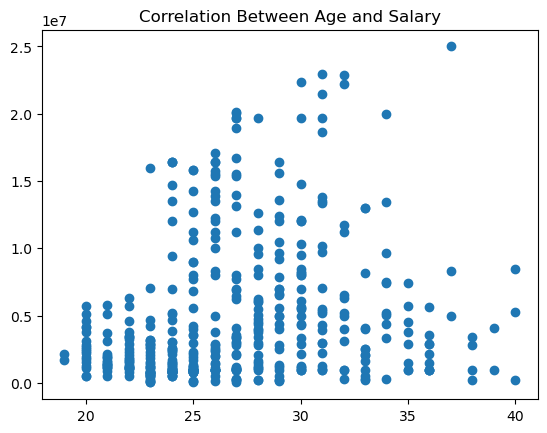

In [45]:
plt.scatter(data=df,x='Age',y='Salary')
plt.title('Correlation Between Age and Salary')